In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('earthquake_data_tsunami.csv')
data

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [9]:
data.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [10]:
data.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

## 1) Time-Based Analysis: 

### ** Explore how earthquake occurrences and tsunami events have changed over the 22-year period  (2001–2022). 

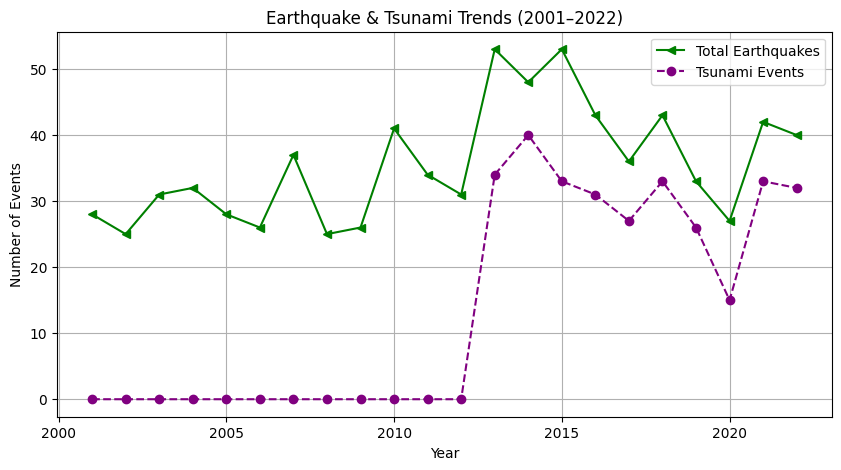

In [3]:
# Group earthquake counts per year
earthquake_count = data.groupby('Year').size()

# Group tsunami events per year (sum of 1s and 0s)
tsunami_count = data.groupby('Year')['tsunami'].sum()

# Plot directly using those grouped results
plt.figure(figsize=(10,5))
plt.plot(earthquake_count.index, earthquake_count.values, 
         marker='<', linestyle='-', color='green', label='Total Earthquakes')

plt.plot(tsunami_count.index, tsunami_count.values, 
         marker='o', linestyle='--', color='purple', label='Tsunami Events')

plt.title("Earthquake & Tsunami Trends (2001–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.legend()
plt.grid(True)
plt.show()

### ** Identify any trends in the frequency or magnitude of earthquakes over time.

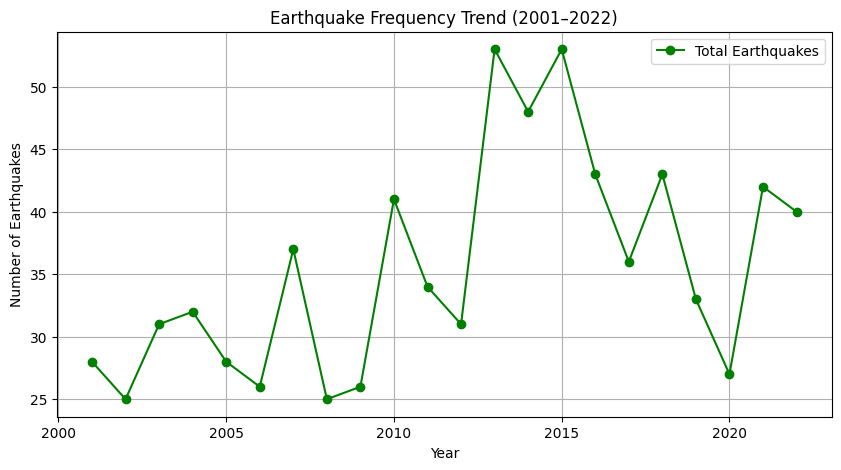

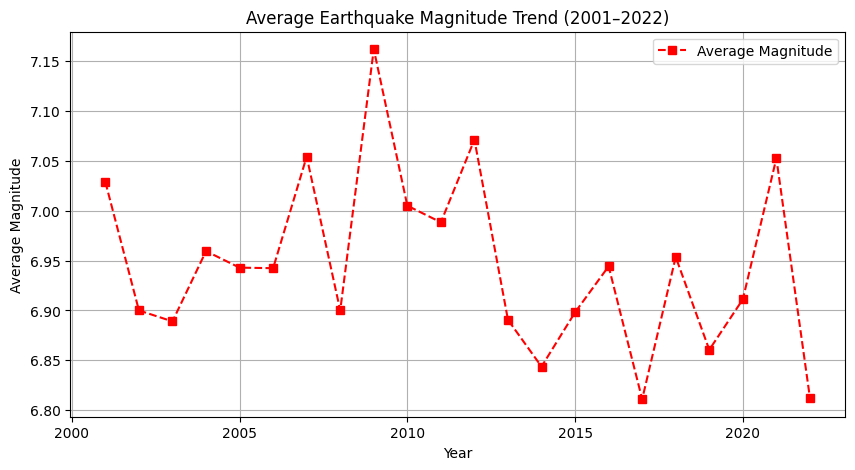

In [13]:
# Group by year to calculate total earthquakes and average magnitude
yearly_data = data.groupby('Year').agg({
    'magnitude': 'mean'
}).reset_index()

# Add total earthquake count
yearly_data['Earthquake_Count'] = data.groupby('Year').size().values

# Plot 1: Earthquake Frequency Over Time
plt.figure(figsize=(10,5))
plt.plot(yearly_data['Year'], yearly_data['Earthquake_Count'], marker='o', color='green', label='Total Earthquakes')
plt.title("Earthquake Frequency Trend (2001–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Average Magnitude Over Time
plt.figure(figsize=(10,5))
plt.plot(yearly_data['Year'], yearly_data['magnitude'], marker='s', linestyle='--', color='red', label='Average Magnitude')
plt.title("Average Earthquake Magnitude Trend (2001–2022)")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.legend()
plt.grid(True)
plt.show()


## 2) Magnitude and Depth Analysis: 

###  **  Analyze the distribution of earthquake magnitudes and depths. 

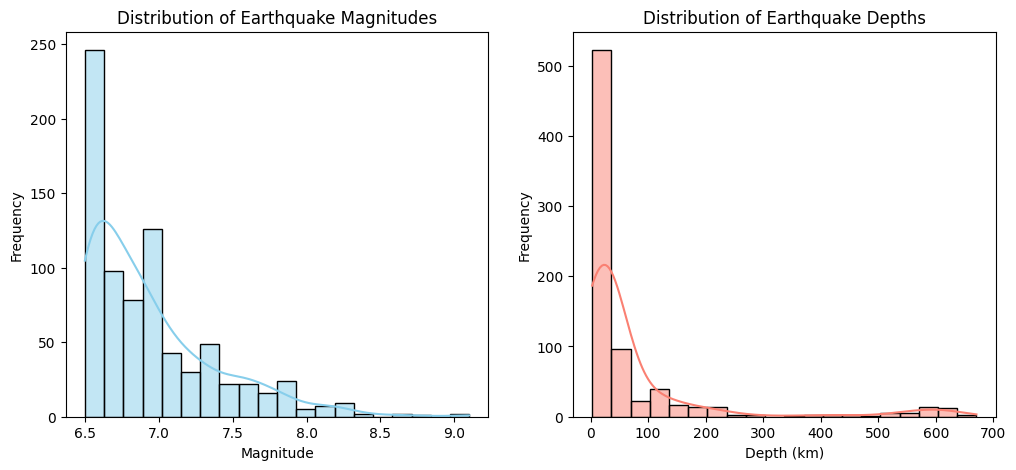

In [4]:
# Plot the distribution of Magnitude and Depth
plt.figure(figsize=(12,5))

# Magnitude distribution
plt.subplot(1,2,1)
sns.histplot(data['magnitude'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')

# Depth distribution
plt.subplot(1,2,2)
sns.histplot(data['depth'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')

plt.show()

### **Compare the average magnitude and depth of tsunami vs. non-tsunami events. 

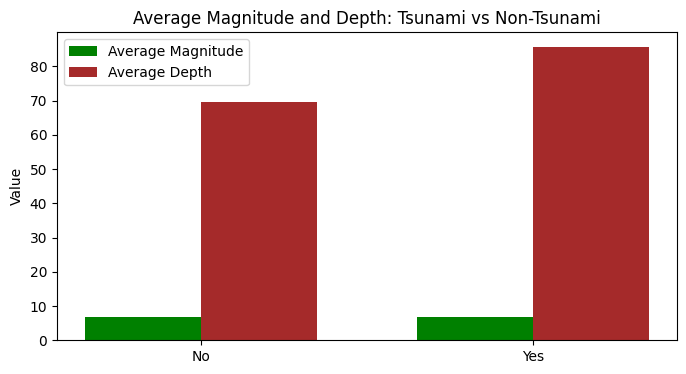

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by tsunami (0 = No, 1 = Yes) and calculate mean
avg_stats = data.groupby('tsunami')[['magnitude','depth']].mean().reset_index()
avg_stats['Tsunami'] = avg_stats['tsunami'].map({0:'No', 1:'Yes'})

# Plotting
plt.figure(figsize=(8,4))
bar_width = 0.35
x = range(len(avg_stats))

# Average Magnitude
plt.bar(x, avg_stats['magnitude'], width=bar_width, label='Average Magnitude', color='green')

# Average Depth
plt.bar([i + bar_width for i in x], avg_stats['depth'], width=bar_width, label='Average Depth', color='Brown')

# X-axis labels
plt.xticks([i + bar_width/2 for i in x], avg_stats['Tsunami'])
plt.ylabel('Value')
plt.title('Average Magnitude and Depth: Tsunami vs Non-Tsunami')
plt.legend()
plt.show()


### ** Highlight major earthquakes (≥8.0) and their characteristics. 

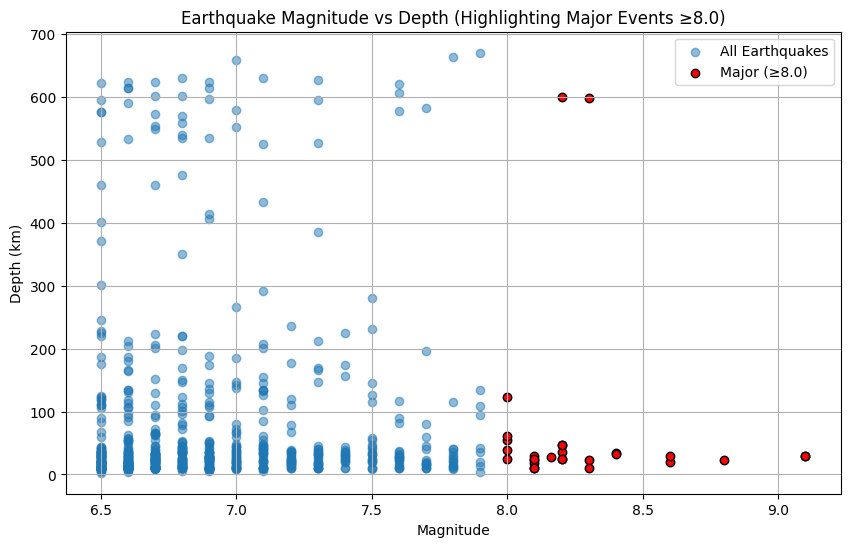

In [6]:
major_eq = data[data['magnitude'] >= 8.0]

plt.figure(figsize=(10,6))
plt.scatter(data['magnitude'], data['depth'], alpha=0.5, label='All Earthquakes')
plt.scatter(major_eq['magnitude'], major_eq['depth'], color='red', label='Major (≥8.0)', edgecolor='black')

plt.title("Earthquake Magnitude vs Depth (Highlighting Major Events ≥8.0)")
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.legend()
plt.grid(True)
plt.show()

## 3) Geographic Distribution Using 2D Plotting: 

###  ** Plot earthquake locations using latitude and longitude on a 2D scatter plot.

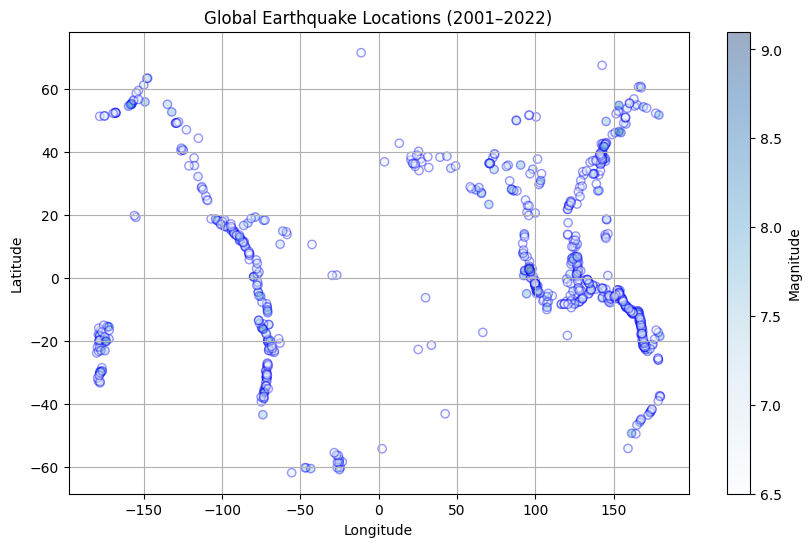

In [15]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(
    data['longitude'], data['latitude'],alpha=0.4,c=data['magnitude'],cmap='Blues',edgecolor='b'
)
plt.title("Global Earthquake Locations (2001–2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Magnitude')
plt.grid(True)
plt.show()



###  ** Visually distinguish between tsunami and non-tsunami events. 

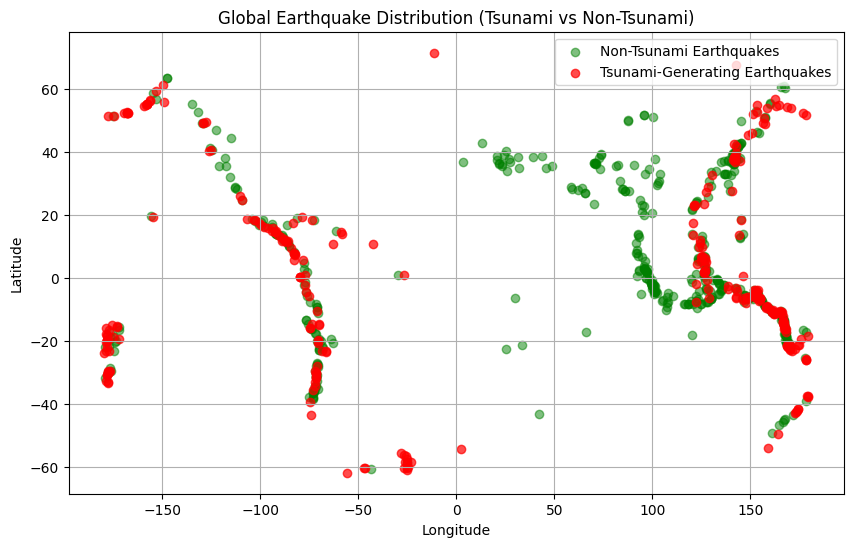

In [16]:
df = pd.DataFrame(data)
# Plot both groups
plt.figure(figsize=(10,6))

plt.scatter(df[data['tsunami'] == 0]['longitude'],
            df[data['tsunami'] == 0]['latitude'],
            color='green', alpha=0.5, label='Non-Tsunami Earthquakes')

plt.scatter(df[data['tsunami'] == 1]['longitude'],            
            df[data['tsunami'] == 1]['latitude'],
            color='red', alpha=0.7, label='Tsunami-Generating Earthquakes')

plt.title("Global Earthquake Distribution (Tsunami vs Non-Tsunami)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()


###  ** Identify clusters or regions with higher concentration of tsunami events (without using map tiles or interactive maps).

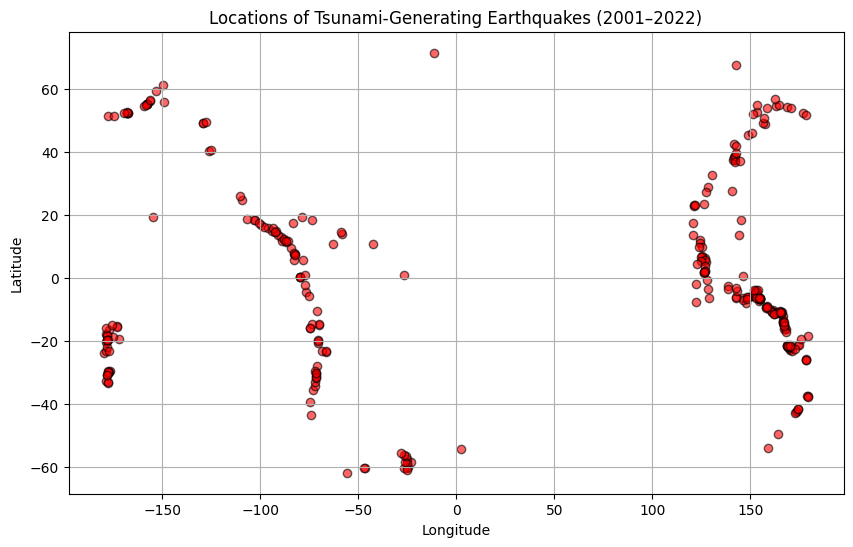

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(
    data[data['tsunami'] == 1]['longitude'],   # filter directly for tsunami events
    data[data['tsunami'] == 1]['latitude'],
    color='red', alpha=0.6, edgecolor='black'
)
plt.title("Locations of Tsunami-Generating Earthquakes (2001–2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## 4) Statistical and Comparative Analysis:

###  ** Use box plots, histograms, and bar chart to compare seismic features between tsunami and non-tsunami events. 

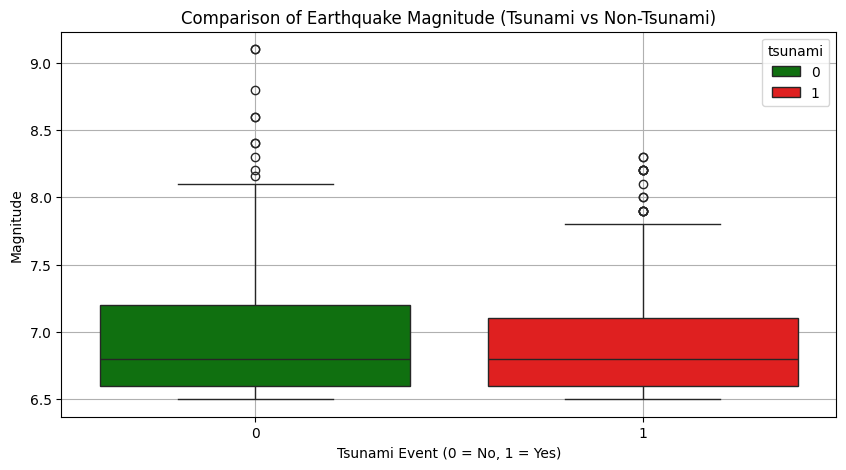

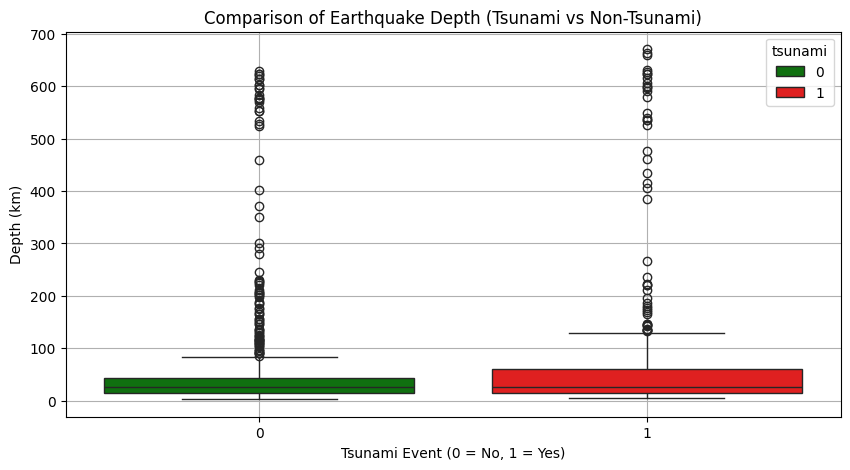

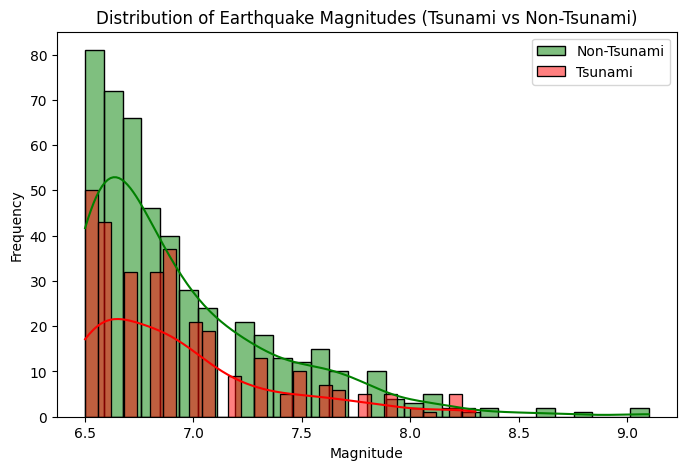

In [18]:
plt.figure(figsize=(10,5))

# Boxplot for Magnitude
sns.boxplot(x='tsunami', y='magnitude',hue='tsunami', data=data, palette=['green', 'red'])
plt.title("Comparison of Earthquake Magnitude (Tsunami vs Non-Tsunami)")
plt.xlabel("Tsunami Event (0 = No, 1 = Yes)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


# Boxplot for Depth
plt.figure(figsize=(10,5))
sns.boxplot(x='tsunami', y='depth',hue='tsunami', data=data, palette=['green', 'red'])
plt.title("Comparison of Earthquake Depth (Tsunami vs Non-Tsunami)")
plt.xlabel("Tsunami Event (0 = No, 1 = Yes)")
plt.ylabel("Depth (km)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data[data['tsunami']==0]['magnitude'], bins=30, color='green', label='Non-Tsunami', kde=True)
sns.histplot(data[data['tsunami']==1]['magnitude'], bins=30, color='red', label='Tsunami', kde=True)
plt.title("Distribution of Earthquake Magnitudes (Tsunami vs Non-Tsunami)")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.legend()
plt.show()


###  ** Analyze correlations between variables using heatmaps. 

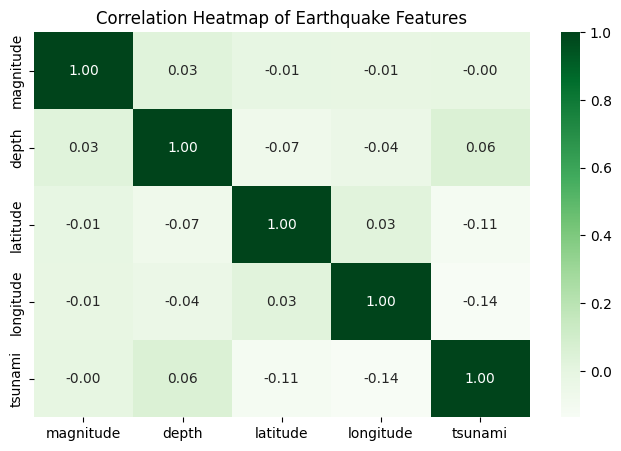

In [19]:
# Select only numeric columns for correlation
numeric_data = data[['magnitude', 'depth', 'latitude', 'longitude', 'tsunami']]

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='Greens', fmt='.2f')

plt.title("Correlation Heatmap of Earthquake Features")
plt.show()

## 5) Insights and Observations:

📊 Key Insights

Consistent Magnitude Range: Average earthquake magnitudes remained steady between 6.8 and 7.1, showing stable global seismic activity.

Dominance of Shallow Quakes: A majority of earthquakes occurred at depths below 300 km, leading to more intense shaking at the surface.

Tsunami-Generating Conditions: Powerful, shallow, and near-coastal earthquakes are the most likely to produce tsunamis.

Major Events (≥8.0): Though infrequent, these massive quakes are high-impact disasters, primarily recorded in the Pacific Ring of Fire (notably 2004 and 2011).

Fluctuating Annual Activity: The yearly earthquake count varied but showed no clear long-term increase over the two decades.

📁 Includes

Annual earthquake frequency and magnitude trends

Relationship between magnitude and depth

Overview of major (≥8.0) earthquakes

Comparative analysis of tsunami vs non-tsunami events